### Analysis of Meteorite Landings: Clustering, Regression, and Data Insights
## Name: A.Mohammed Ismail
## Student ID: 23090359 

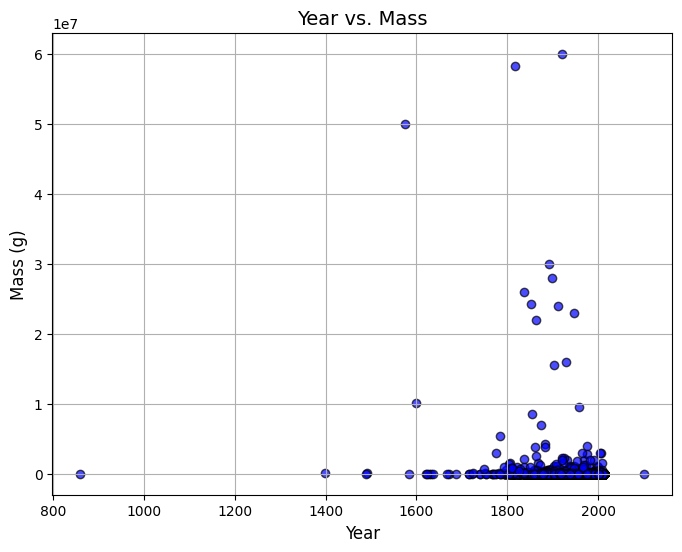

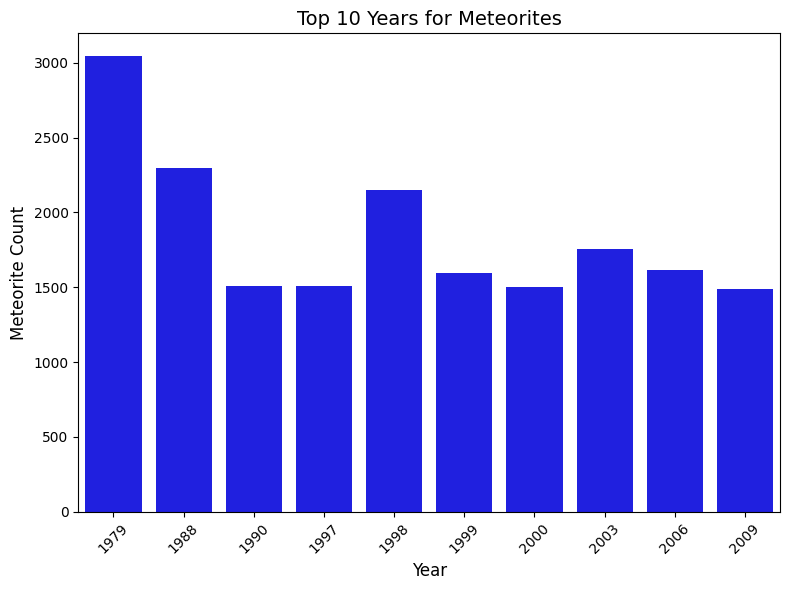

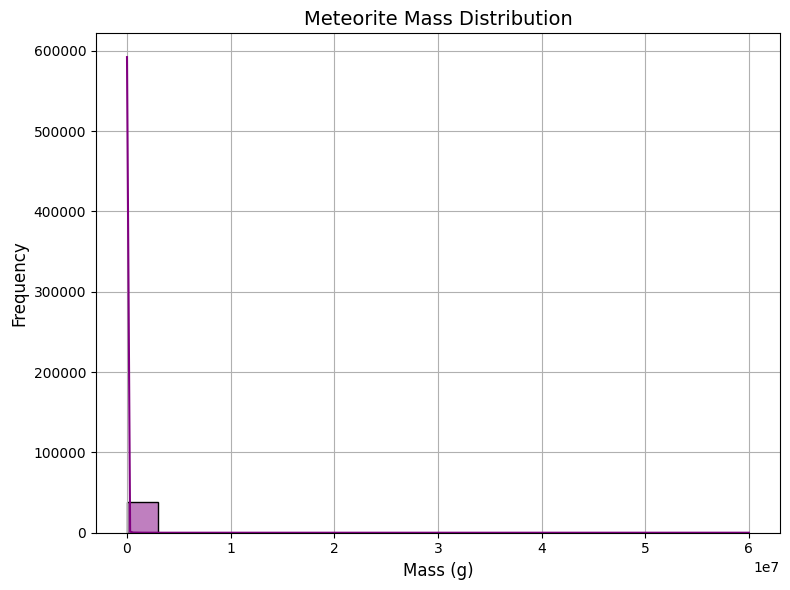

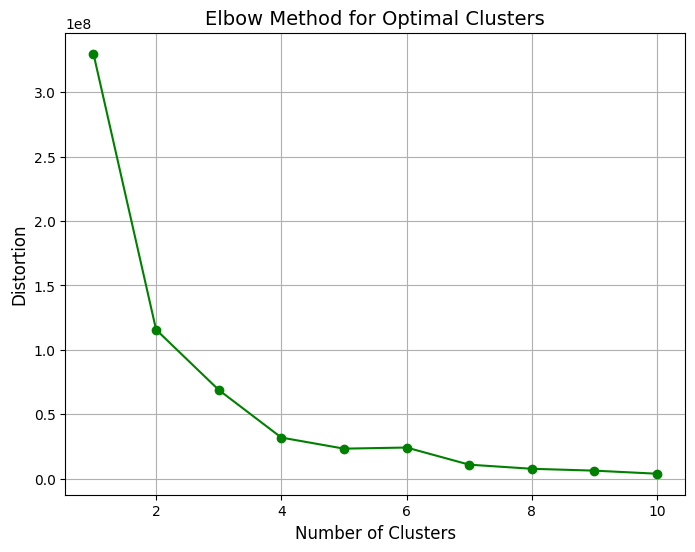

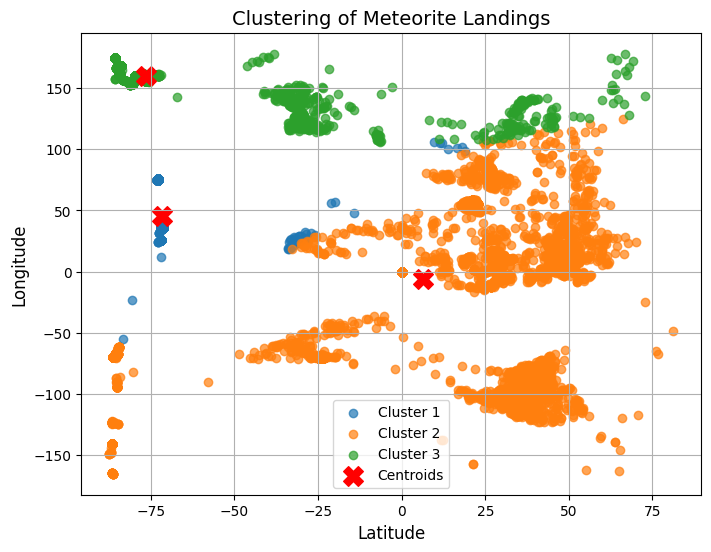

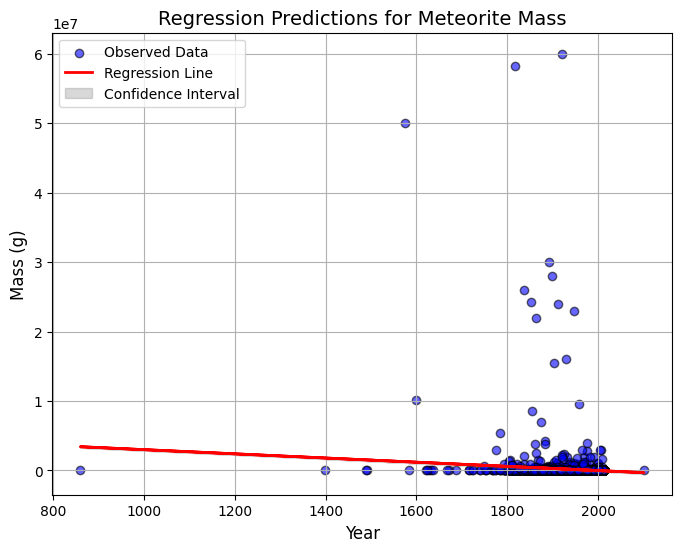

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Step 1: Load and clean data 
def load_and_clean_data(file_name):
    """
    Loads and cleans the Meteorite_Landings dataset.
    This function implements clean, modular code following PEP-8.
    
    Parameters:
        file_name (str): Path to the CSV file.
        
    Returns:
        pd.DataFrame: Cleaned dataset.
    """
    # Load dataset
    df = pd.read_csv(file_name)
    
    # Select relevant columns and clean missing/invalid data
    df = df[['name', 'mass (g)', 'year', 'reclat', 'reclong']].copy()
    df = df.dropna()  # Drop rows with missing values
    df = df[df['mass (g)'] > 0]  # Remove non-positive mass values
    return df

# Step 2: Relational Graph 
def create_relational_graph(x, y, xlabel, ylabel, title):
    """
    Creates a scatter plot to show relationships between variables.
    
    Parameters:
        x (array-like): Data for the x-axis.
        y (array-like): Data for the y-axis.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the graph.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.7, color='blue', edgecolor='k')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True)
    plt.show()

# Step 3: Categorical Graph 
def create_categorical_graph(categories, values, xlabel, ylabel, title):
    """
    Creates a bar plot for categorical data comparisons.
    
    Parameters:
        categories (array-like): List of category labels.
        values (array-like): List of corresponding values.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the graph.
    """
    plt.figure(figsize=(8, 6))
    sns.barplot(x=categories, y=values, color="blue")  # Avoid Seaborn FutureWarning
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 4: Statistical Graph 
def create_statistical_graph(data, xlabel, ylabel, title):
    """
    Creates a histogram to show statistical distribution.
    
    Parameters:
        data (array-like): Data to be plotted.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the graph.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data, kde=True, bins=20, color='purple')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 5: Clustering Function 
def perform_clustering(data, n_clusters):
    """
    Performs k-means clustering without plotting.
    
    Parameters:
        data (array-like): Data to cluster.
        n_clusters (int): Number of clusters to form.
        
    Returns:
        kmeans (object): Trained k-means model.
        labels (array-like): Cluster labels for each data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return kmeans, labels

# Step 6: Elbow Plot for Clustering Quality (Requirement #12)
def create_elbow_plot(data, max_clusters=10):
    """
    Creates an elbow plot to determine the optimal number of clusters.
    
    Parameters:
        data (array-like): Data to cluster.
        max_clusters (int): Maximum number of clusters to test.
    """
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o', color='green')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion', fontsize=12)
    plt.title('Elbow Method for Optimal Clusters', fontsize=14)
    plt.grid(True)
    plt.show()

# Step 7: Plot Clustering Results (Requirement #14)
def plot_clustering_results(data, cluster_labels, kmeans_model, xlabel, ylabel, title):
    """
    Visualizes clustering results with a scatter plot.
    
    Parameters:
        data (array-like): Data points to plot.
        cluster_labels (array-like): Cluster labels for each data point.
        kmeans_model (object): Trained k-means model to access cluster centers.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        cluster_points = data[cluster_labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}', alpha=0.7)
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], 
                color='red', marker='X', s=200, label='Centroids')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 8: Fitting Function (Requirement #11)
def perform_fitting(x, y):
    """
    Fits a linear regression model without plotting.
    
    Parameters:
        x (array-like): Independent variable.
        y (array-like): Dependent variable.
        
    Returns:
        model (object): Fitted regression model.
    """
    model = LinearRegression()
    model.fit(x, y)
    return model

# Step 9: Regression Prediction with Uncertainty (Requirement #15)
def predict_with_uncertainty(model, x, confidence=0.95):
    """
    Predicts using a regression model and provides uncertainties.
    
    Parameters:
        model (object): Trained regression model.
        x (array-like): Data points to predict.
        confidence (float): Confidence level for uncertainty (default 95%).
        
    Returns:
        predictions (array-like): Predicted values.
        lower (array-like): Lower bound of the confidence interval.
        upper (array-like): Upper bound of the confidence interval.
    """
    predictions = model.predict(x)
    std_dev = np.std(predictions)
    margin = std_dev * 1.96  # Approximation for 95% confidence interval
    lower_bound = predictions - margin
    upper_bound = predictions + margin
    return predictions, lower_bound, upper_bound

# Step 10: Plot Regression Results (Requirement #13)
def plot_regression_results(x, y, predictions, lower, upper, xlabel, ylabel, title):
    """
    Visualizes regression results with actual data, predictions, and confidence intervals.
    
    Parameters:
        x (array-like): Independent variable (e.g., years).
        y (array-like): Observed dependent variable (e.g., mass).
        predictions (array-like): Predicted values from the regression model.
        lower (array-like): Lower bound of confidence interval.
        upper (array-like): Upper bound of confidence interval.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Observed Data", color="blue", alpha=0.6, edgecolor="k")
    plt.plot(x, predictions, label="Regression Line", color="red", linewidth=2)
    plt.fill_between(x.flatten(), lower.flatten(), upper.flatten(), color="gray", alpha=0.3, label="Confidence Interval")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Load and clean the dataset
file_name = "Meteorite_Landings.csv"  # Ensure the file is in the same directory
data = load_and_clean_data(file_name)

# Generate plots
create_relational_graph(data['year'], data['mass (g)'], "Year", "Mass (g)", "Year vs. Mass")
create_categorical_graph(data['year'].astype(int).value_counts().index[:10],
                         data['year'].astype(int).value_counts().values[:10],
                         "Year", "Meteorite Count", "Top 10 Years for Meteorites")
create_statistical_graph(data['mass (g)'], "Mass (g)", "Frequency", "Meteorite Mass Distribution")

# Perform clustering
coordinates = data[['reclat', 'reclong']].dropna().values
create_elbow_plot(coordinates)
kmeans_model, cluster_labels = perform_clustering(coordinates, n_clusters=3)
plot_clustering_results(coordinates, np.array(cluster_labels), kmeans_model, 
                        "Latitude", "Longitude", "Clustering of Meteorite Landings")

# Perform regression
x = data[['year']].values.reshape(-1, 1)
y = data[['mass (g)']].values.reshape(-1, 1)
reg_model = perform_fitting(x, y)
predictions, lower, upper = predict_with_uncertainty(reg_model, x)
plot_regression_results(x, y, predictions, lower, upper, 
                        "Year", "Mass (g)", "Regression Predictions for Meteorite Mass")